# Ohio State University 2023 Earnings - EDA and Models

This project provides an exploratory data analysis (EDA) of The Ohio State University 2023 Combined Earnings dataset. It explores the structure of the data, investigates object and numerical variables, and delves into gender pay gap analysis through various visualizations and statistical techniques. This repository includes not only the EDA but also model implementations to identify outliers and patterns in the earnings data.

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import Scikit-learn for Machine Learning libraries
from sklearn.linear_model import (LinearRegression, HuberRegressor, RANSACRegressor)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, IsolationForest)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [3]:
# See all column names & rows when you doing .head(). None of the column name will be truncated.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.options.mode.copy_on_write = True

# About the dataset
`The Ohio State University 2023 Combined Earnings` dataset is taken from its website at https://apps.hr.osu.edu/salaries/

**It has been changed to suit analysis purposes.**

**Statistics and Reports**\
The Office of Human Resources provides analysis and reporting of human resources management information, including demographics, internal and external markets for faculty and staff salaries, and mandated federal and state reporting.

**Earnings**\
Earnings dataset includes all non-student employees’ regular, overtime, bonus and sick leave/vacation payout for the timeframe. For individuals with more than one job title/appointment, their earnings are listed in the area that corresponds to their primary appointment.

**About the Data**\
Amounts represent paid earnings, including corrections to prior payrolls and in some cases may reflect negative values.
- Regular: components of the employee’s regular pay, including paid leave
- Overtime: includes call back pay, FLSA premium and holiday pay (worked)
- Bonus: includes staff award, STEP faculty and STEP staff
- Other: remaining components of the employee’s pay

**Form Field Definitions**\
Database: Differentiates positions associated with the Wexner Medical Center/Health System, Athletics, and the rest of the university.
The Ohio State Athletics Department operates a self-sustaining budget, receiving no University general funds, student fees or state tax support.
The Wexner Medical Center/Health System operates a self-sustaining budget, receiving no University general funds, student fees or state tax support.

Resulting Data: Earnings data includes all non-student employees’ regular, overtime, bonus and sick leave/vacation payout for 2023. For individuals with more than one job title/appointment, their earnings are listed in the area that corresponds to their primary appointment.

**The original file contained the following columns:**
- Last Name - Legal
- First Name - Preferred
- Job Profile Name
- Cost Center
- Cost Center Hierarchy CCH6
- Position Group
- Regular Pay (Base Pay + Paid Time Off + Premium)
- Bonus
- Overtime
- Other (Allowance + Supplemental + Uncategorized)
- Gross Pay

**The updated file contains the following columns:**
- full_name
- gender
- position_group
- job hierarchy
- cost_center
- regular_pay
- bonus
- other
- overtime
- gross_pay

# Load the Dataset

In [4]:
df = pd.read_excel("Data/OSU-2023-Earnings-Cleaned.xlsx")

# Overview of the dataset to understand its structure and contents.

In [5]:
# View the first few rows
df.head()

full_name  gender position_group                           job  \
0     Eric Green    Male     University          Professor - Clinical   
1     Chris Brew    Male     University  Visiting Associate Professor   
2     Robin Judd    Male     University      Associate Professor (9M)   
3  Ian Wilkinson    Male     University                Professor (9M)   
4   Maria Conroy  Female     University      Associate Professor (9M)   

                          hierarchy  \
0          Veterinary Medicine CCH6   
1                  Engineering CCH6   
2            Arts and Sciences CCH6   
3  Education and Human Ecology CCH6   
4                  Engineering CCH6   

                                         cost_center  regular_pay     bonus  \
0  CC10587 Veterinary Medicine | Veterinary Clini...    181225.86  29332.76   
1  CC11786 Engineering | Computer Science and Eng...      7429.90      0.00   
2                CC12460 Arts and Sciences | History    111042.26      0.00   
3  CC11186 EHE | Teaching and Learning Administra...    114951.75      0.00   
4  CC11809 Engineering | Knowlton School of Archi...    106820.50      0.00   

    other  overtime  gross_pay  
0  3000.0       0.0  213558.62  
1     0.0       0.0    7429.90  
2  3000.0       0.0  114042.26  
3     0.0       0.0  114951.75  
4     0.0       0.0  106820.50

In [164]:
df.describe()

regular_pay      bonus      other  overtime  gross_pay
count     41887.00   41887.00   41887.00  41887.00   41887.00
mean      68786.18    2340.08    2783.56   1081.56   74991.38
std       74811.14   16091.00   37499.63   4256.52  100273.81
min       -2185.73   -1000.00   -2500.00    -14.99       0.02
25%       27608.19       0.00       0.00      0.00   29155.01
50%       55040.43       0.00       0.00      0.00   57726.00
75%       87366.13     600.00      17.88    192.47   91459.01
max     2433750.06 1385737.50 6923462.58 152487.38 9173462.62

In [6]:
# Overview of data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41887 entries, 0 to 41886
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   full_name       41887 non-null  object 
 1   gender          41887 non-null  object 
 2   position_group  41887 non-null  object 
 3   job             41887 non-null  object 
 4   hierarchy       41887 non-null  object 
 5   cost_center     41887 non-null  object 
 6   regular_pay     41887 non-null  float64
 7   bonus           41887 non-null  float64
 8   other           41887 non-null  float64
 9   overtime        41887 non-null  float64
 10  gross_pay       41887 non-null  float64
dtypes: float64(5), object(6)
memory usage: 3.5+ MB


**There are no missing values and each column has the correct data type.**

## Presence of negative values
A commentary to the data states: "Amounts represent paid earnings, including corrections to prior payrolls and in some cases may reflect negative values." Nevertheless, it concerns me that the amount of negative values in some categories account for up to 70 percent of all observations. 

If there are no data entry errors, several factors specific to the nature of the data or the institution's practices might explain this
- `Adjustments and Corrections`
    - *Widespread Overpayments* If there were systemic overpayments to a large number of employees, the subsequent adjustments to correct these overpayments could result in a high number of negative values.
    - *Year-End Adjustments*: Annual adjustments to reconcile accounts might be recorded as negative values if the initial estimates were higher than the final amounts.
***
- `Deductions and Recoveries`:
   - *Loan Repayments* If a significant portion of the workforce has taken advances or loans that are being repaid through payroll deductions, these deductions might be recorded as negative values.
   - *Benefit Contributions*: High and widespread contributions to benefit plans (e.g., retirement, healthcare) that are deducted from salaries might appear as negative values in the data.
***
- `Special Payroll Accounting Practices`:
   - *Contra Accounts*: If the institution uses contra accounts to offset various payroll components, many values might be recorded as negative to reflect these offsets.
   - *Reimbursements*: Regular reimbursements or refunds, if recorded as negative values, could contribute significantly to the overall dataset.
***
- `Leave and Absence Policies`:
   - *Unpaid Leave*: If a large number of employees take unpaid leave, the adjustments might result in negative values in payroll records.
   - *Clawbacks*: Regular clawbacks for benefits or other allowances due to leave or other reasons might be recorded as negative values.
***
- `Employee Turnover and Final Settlements`:
   - *High Turnover*: If there is high employee turnover, final settlements might include negative values due to recoveries or adjustments for previously issued benefits or pay.
***
- `Large-Scale Financial Adjustments`:
   - *Budget Cuts or Financial Reconciliation*: If the institution is undergoing budget cuts or financial reconciliation, it might result in a large number of negative adjustments to payroll data.  

### Compare to data from other university
I happen to have similar data from Ohio University to examine and compare with OSU data.

In [7]:
ohio_uni = pd.read_excel("Data/Compensation Data Final 2023.xlsx")

In [8]:
ohio_uni.describe()

APPOINTMENT_TYPE_MONTHS  MEDICARE WAGES      ADDL_COMP    BASE_SALARY
count              3140.000000     5057.000000    4733.000000    5057.000000
mean                 11.007325    58096.326674   10360.860137   49438.688784
std                   1.398451    49778.583247   18010.894424   50937.556410
min                   9.000000       17.040000       1.610000       0.000000
25%                   9.000000    25201.370000    2000.000000      20.170000
50%                  12.000000    50531.240000    3905.000000   52020.000000
75%                  12.000000    77610.670000   11090.000000   78030.000000
max                  12.000000   730549.400000  219476.600000  603000.000000

As we can see, no negative values are present in any of the columns in the Ohio University dataset (which may suggest a more straightforward or standardized accounting process, or it could indicate better data quality controls).

Also, Ohio State University seems to have a wider range of earnings, with more pronounced outliers, especially in bonus and other compensations.
The Ohio University dataset, while still variable, seems more consistent in terms of salary distribution (though it covers different compensation components).

This fact requires further investigation and analysis.

# Analyze object data

In [9]:
obcol = df.select_dtypes(include=["object"])
obcol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41887 entries, 0 to 41886
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   full_name       41887 non-null  object
 1   gender          41887 non-null  object
 2   position_group  41887 non-null  object
 3   job             41887 non-null  object
 4   hierarchy       41887 non-null  object
 5   cost_center     41887 non-null  object
dtypes: object(6)
memory usage: 1.9+ MB


## Analyze frequencies/percentages of some data

In [182]:
oth_data = df[['gender', 'position_group', 'hierarchy']]

In [185]:
pd.options.display.float_format = '{:.2f}'.format
for col in oth_data:
    print(col, "----------------------", "frequencies", oth_data[col].value_counts(),"percentages", 
          oth_data[col].value_counts(normalize=True),
          sep="\n\n", end="\n\n\n")

gender

----------------------

frequencies

gender
Female    24639
Male      17248
Name: count, dtype: int64

percentages

gender
Female   0.59
Male     0.41
Name: proportion, dtype: float64


position_group

----------------------

frequencies

position_group
University       22102
Health System    17640
Athletics         2145
Name: count, dtype: int64

percentages

position_group
University      0.53
Health System   0.42
Athletics       0.05
Name: proportion, dtype: float64


hierarchy

----------------------

frequencies

hierarchy
Medicine CCH6                                              5600
Health System | University Hospital CCH6                   5345
Health System | James Cancer Hospital CCH6                 4474
Arts and Sciences CCH6                                     2415
Athletics and Business Advancement CCH6                    2145
Food, Agricultural, and Environmental Sciences CCH6        1955
Health System | Shared Services CCH6                       1885
Academic A

### Gender

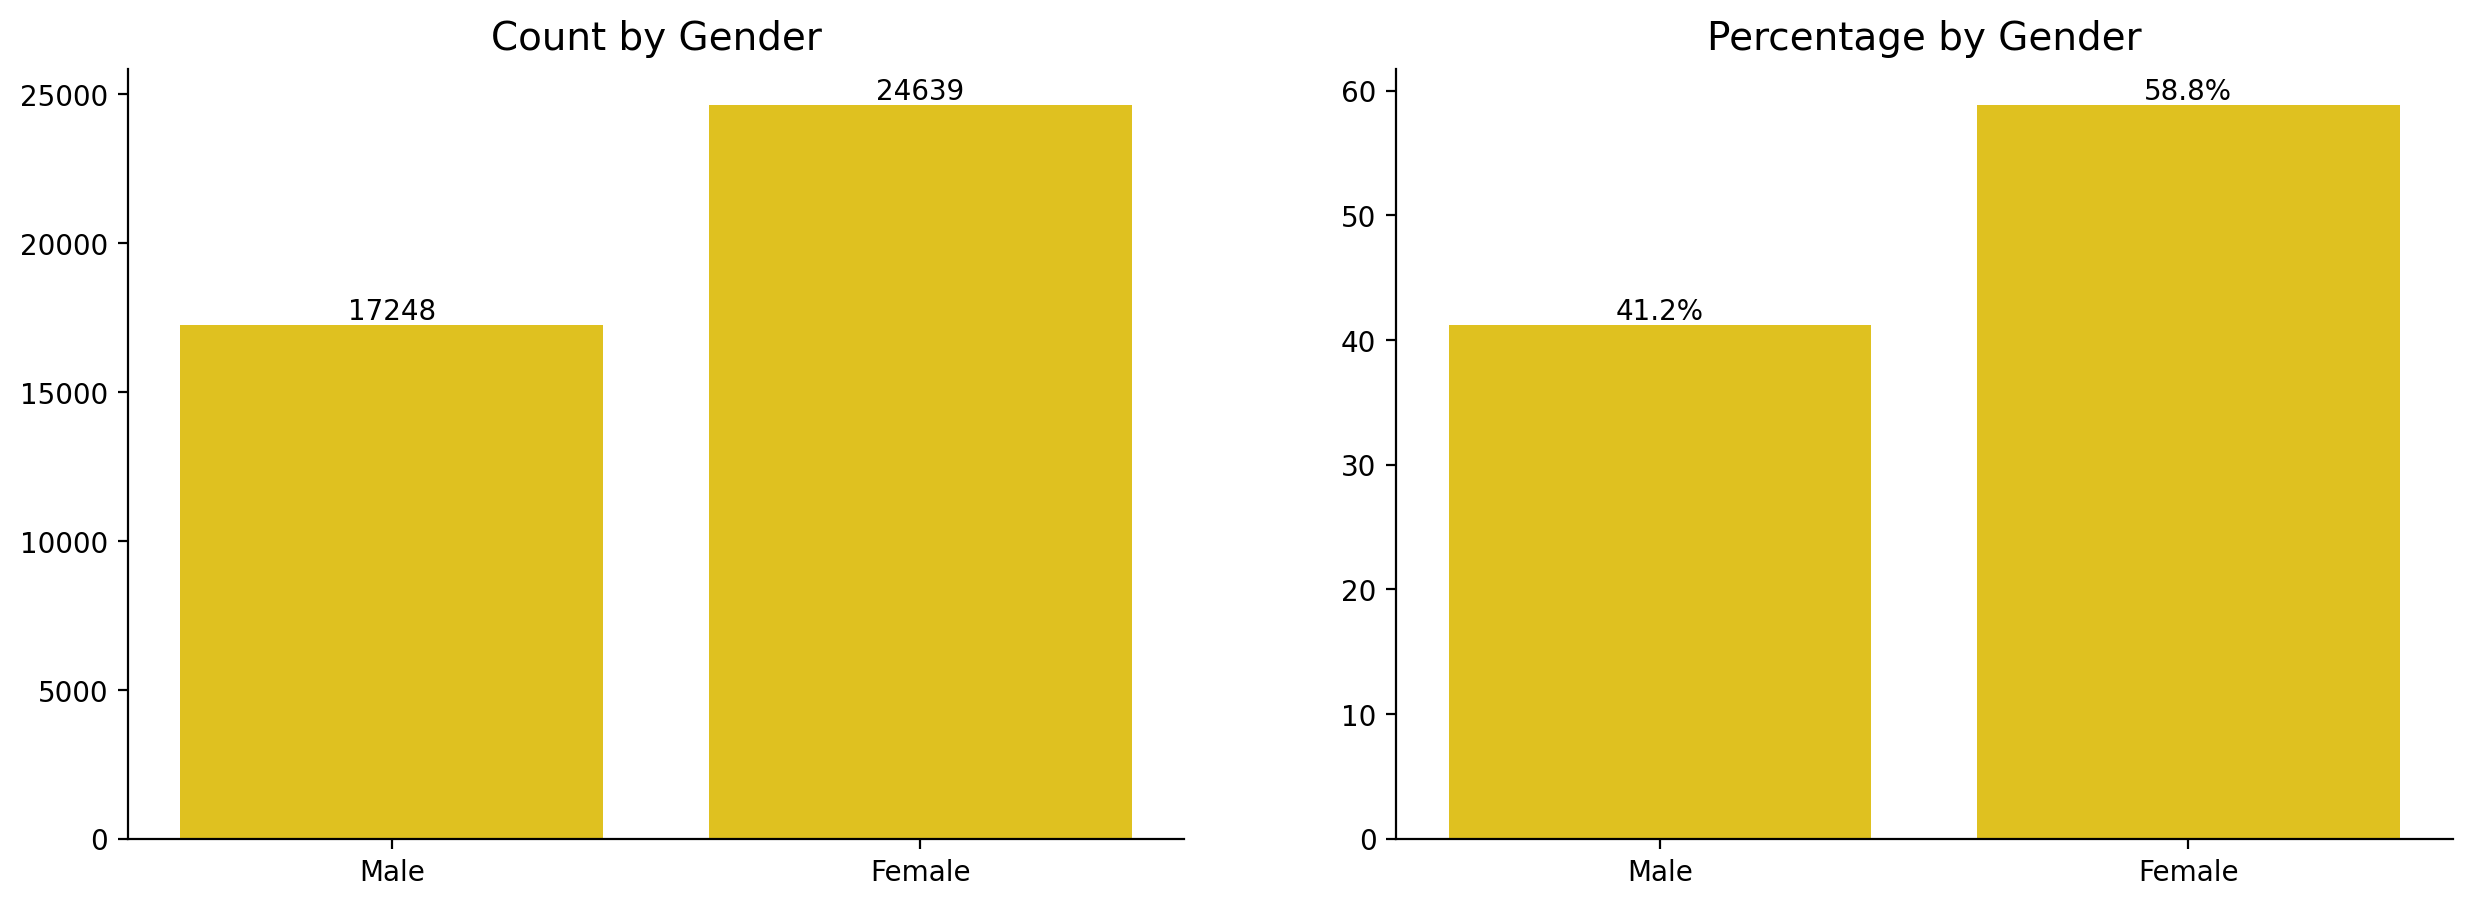

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15,5), sharey=False, sharex=True, dpi = 200)
sns.despine(fig)

p1= sns.countplot(x ='gender', data = df, color = 'gold', ax=ax[0])
for container in p1.containers:
    ax[0].bar_label(container, fontsize=10)

p2 = sns.countplot(x ='gender', data = df, color = 'gold', stat = 'percent', ax=ax[1] )
for container in p2.containers:
    ax[1].bar_label(container, fontsize=10, fmt= '{:.1f}%')

p1.set(xlabel='', ylabel='')
p2.set(xlabel='', ylabel='')
ax[0].set_title('Count by Gender', pad = 7, fontsize=14)
ax[1].set_title('Percentage by Gender', pad = 7, fontsize=14)

plt.show()

**There are more women in OSU**

### Position Groups

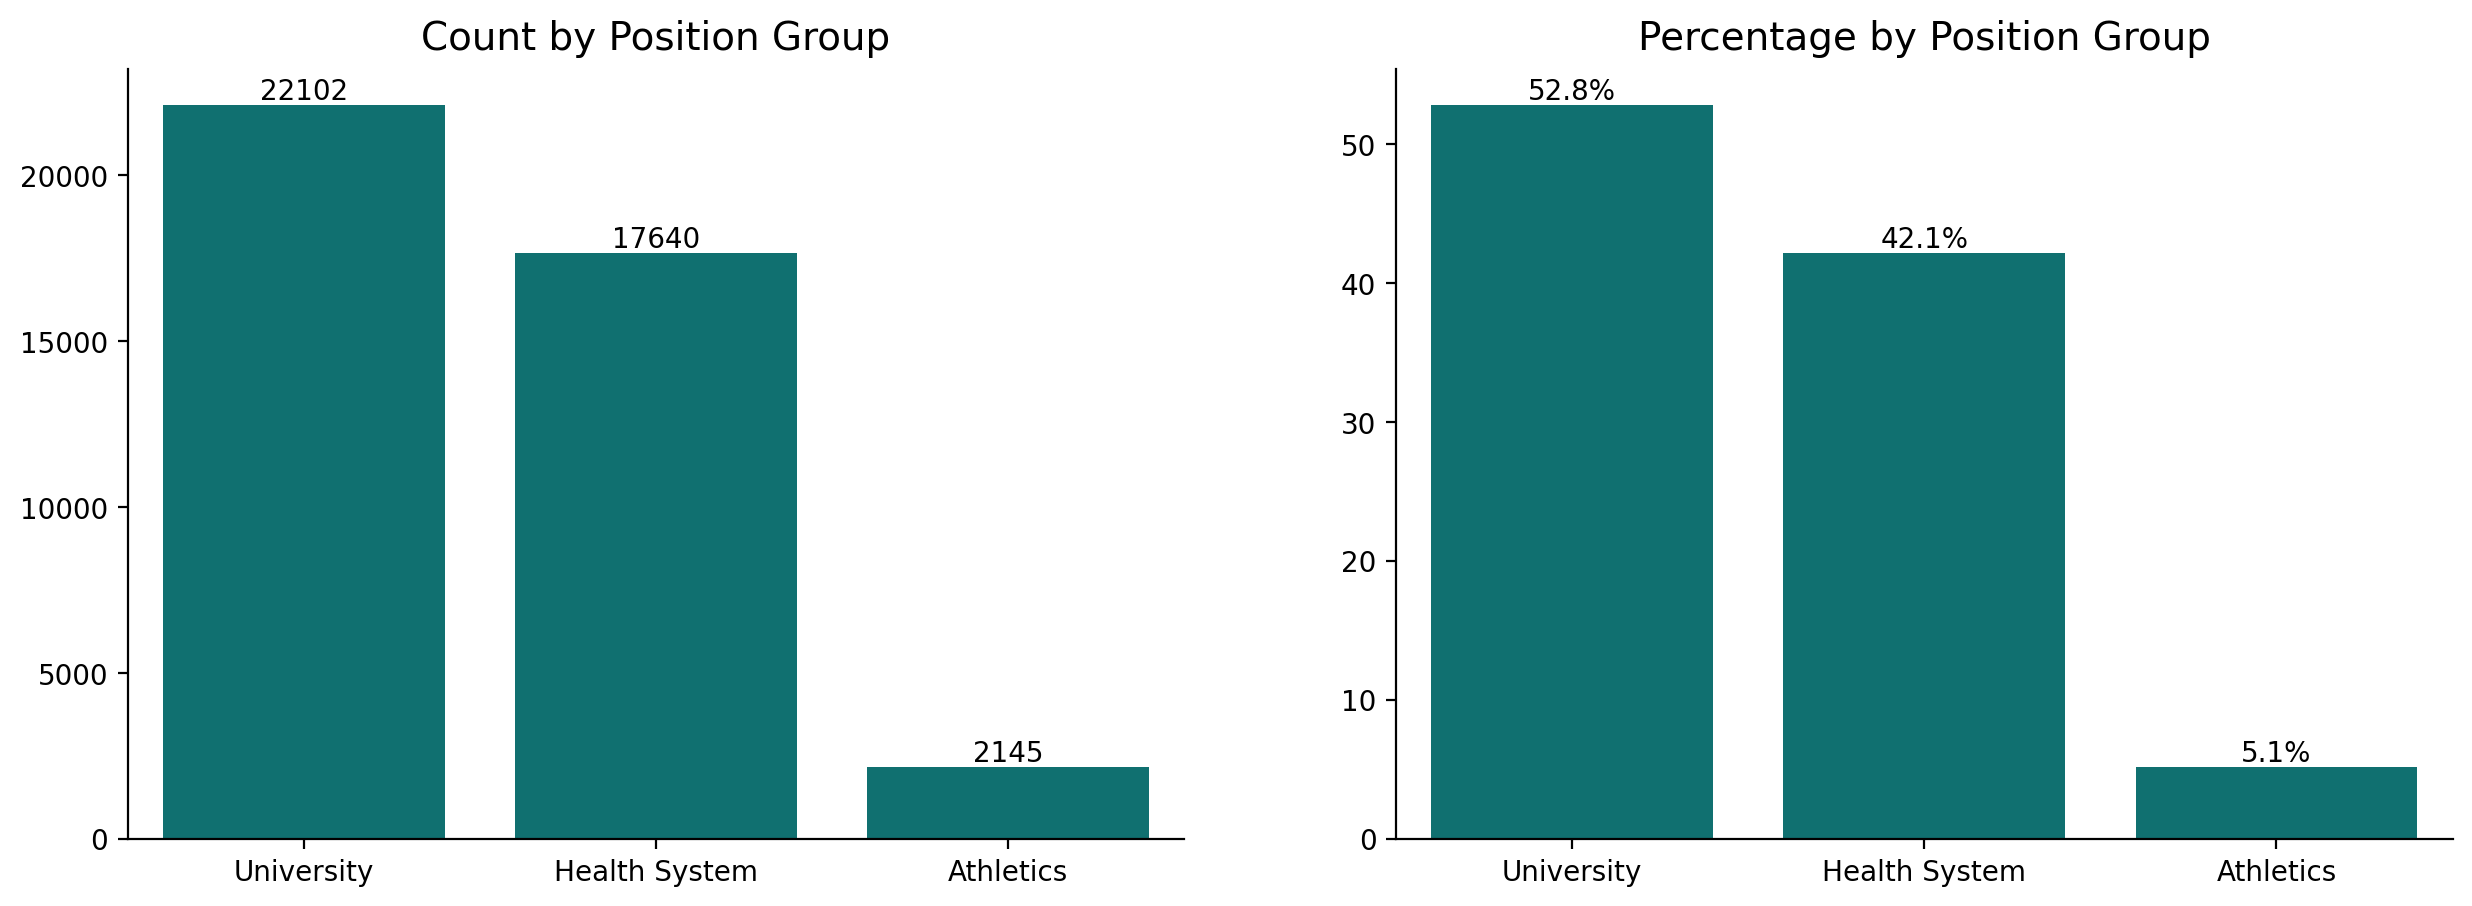

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,5), sharey=False, sharex=True, dpi = 200)
sns.despine(fig)

p1= sns.countplot(x ='position_group', data = df, color = 'teal', ax=ax[0])
for container in p1.containers:
    ax[0].bar_label(container, fontsize=10)

p2 = sns.countplot(x ='position_group', data = df, color = 'teal', stat = 'percent', ax=ax[1] )
for container in p2.containers:
    ax[1].bar_label(container, fontsize=10, fmt= '{:.1f}%')

p1.set(xlabel='', ylabel='')
p2.set(xlabel='', ylabel='')
ax[0].set_title('Count by Position Group', pad = 7, fontsize=14)
ax[1].set_title('Percentage by Position Group', pad = 7, fontsize=14)

plt.show()

**Most people work for University, least number of people, more than ten times fewer, work for Athletics position group.**

## Gender and Position Groups

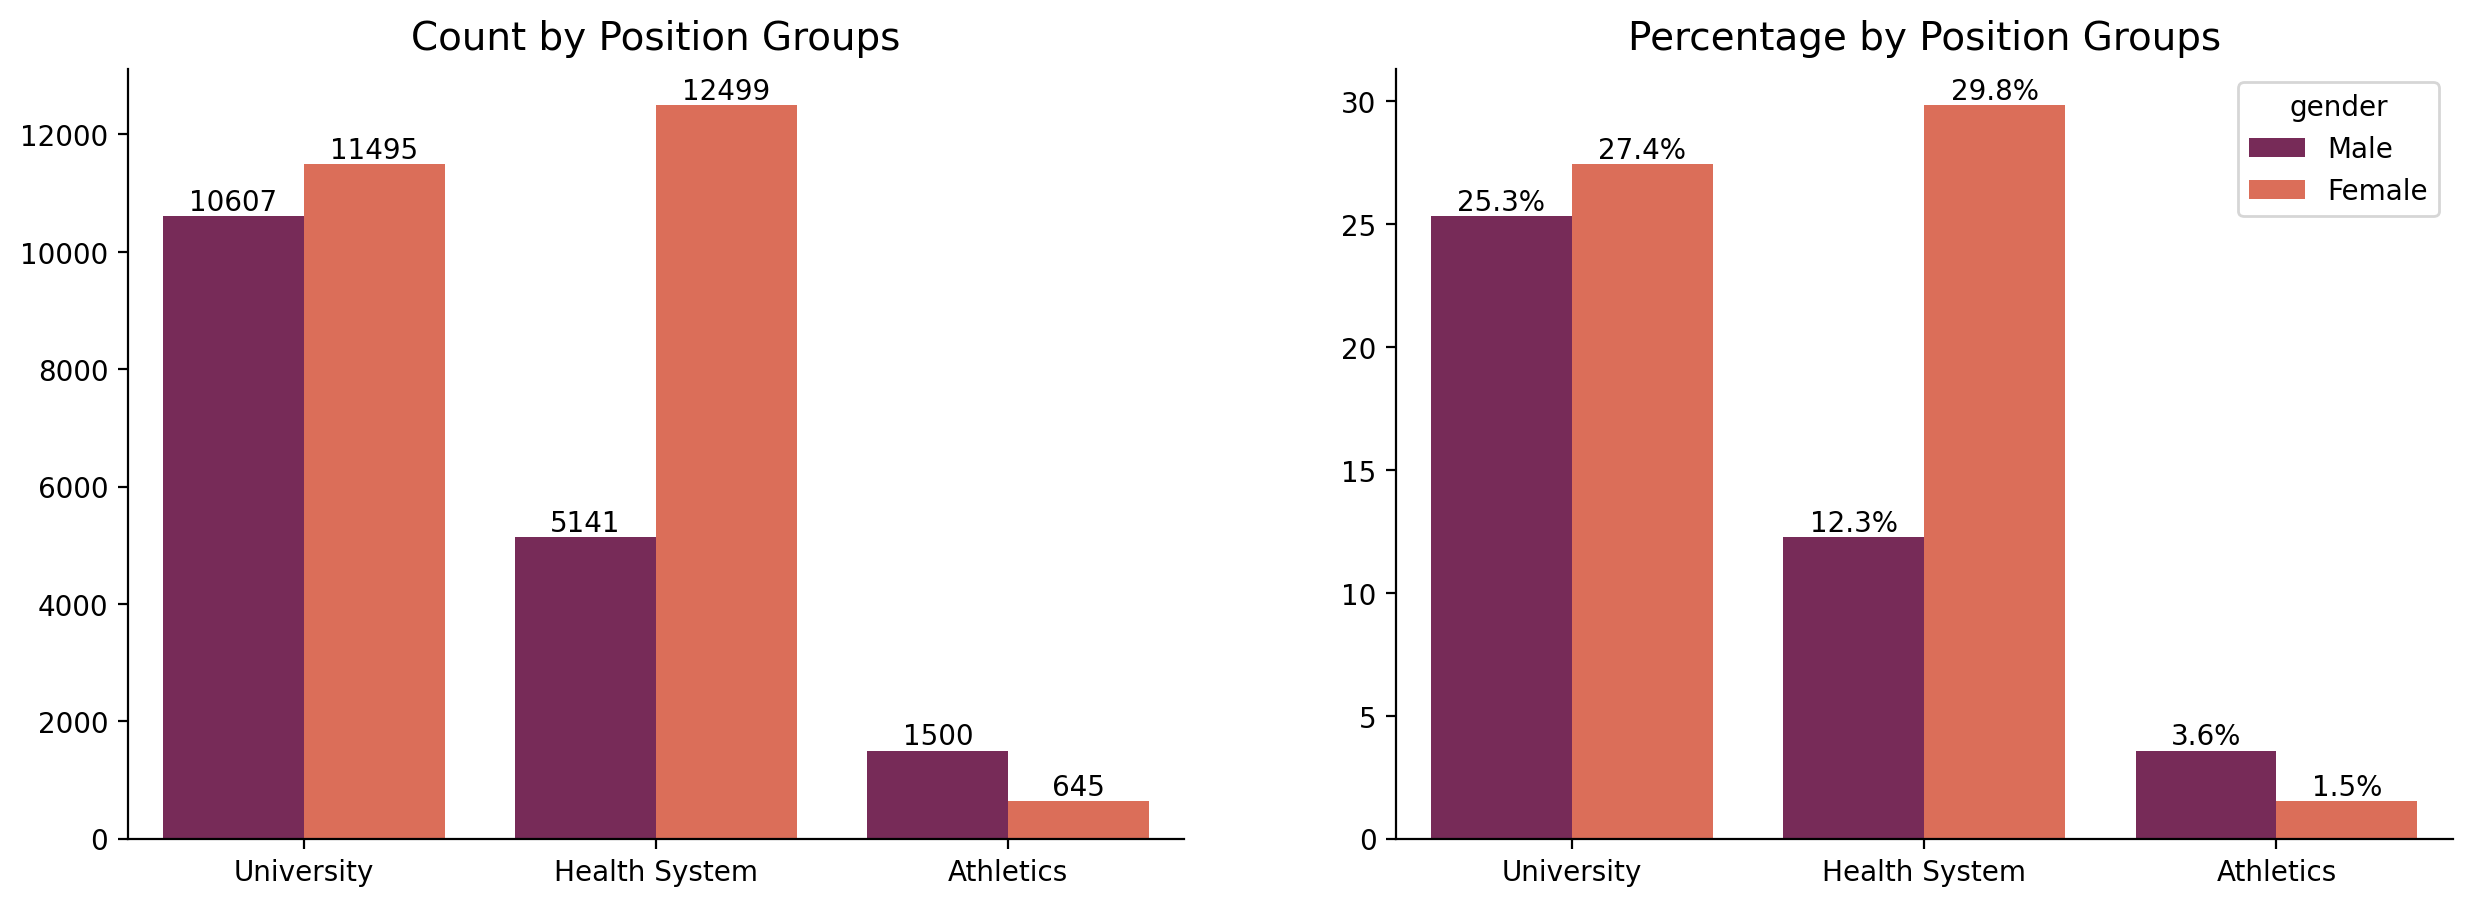

In [14]:
fig, ax = plt.subplots(1,2,figsize=(15,5), sharey=False, sharex=True, dpi = 200)
sns.despine(fig)

p1= sns.countplot(x ='position_group', hue = "gender", data = df, palette = "rocket", ax=ax[0])
for container in p1.containers:
    ax[0].bar_label(container, fontsize=10)

p2 = sns.countplot(x ='position_group', hue = "gender", data = df, palette = "rocket", stat = 'percent', ax=ax[1] )
for container in p2.containers:
    ax[1].bar_label(container, fontsize=10, fmt= '{:.1f}%')

p1.set(xlabel='', ylabel='')
p2.set(xlabel='', ylabel='')
ax[0].set_title('Count by Position Groups', pad = 7, fontsize=14)
ax[1].set_title('Percentage by Position Groups', pad = 7, fontsize=14)
ax[0].get_legend().set_visible(False)

plt.show()

**Observations**:
- As we can see, `University` shows near parity between genders, suggesting a more balanced distribution in academic or administrative roles.
- The `Health System` is a female-dominated sector, indicating a possible gender trend in professions related to health within this dataset.
- `Athletics` remains male-dominated, which aligns with traditional gender roles in sports-related fields.


# Analyze numerical data

## Overview

In [15]:
# Summary statistics for numerical columns
df.describe().apply(lambda s: s.apply('{0:.0f}'.format))

regular_pay    bonus    other overtime gross_pay
count       41887    41887    41887    41887     41887
mean        68786     2340     2784     1082     74991
std         74811    16091    37500     4257    100274
min         -2186    -1000    -2500      -15         0
25%         27608        0        0        0     29155
50%         55040        0        0        0     57726
75%         87366      600       18      192     91459
max       2433750  1385738  6923463   152487   9173463

In [16]:
# dataset with all the numerical columns
numcol = df.select_dtypes(include=["number"])

In [17]:
# detailed percentile data
numcol.quantile(np.arange(0.0, 1.1,0.1)).apply(lambda s: s.apply('{0:.1f}'.format))

regular_pay      bonus      other  overtime  gross_pay
0.00     -2185.7    -1000.0    -2500.0     -15.0        0.0
0.10      5541.6        0.0        0.0       0.0     6179.8
0.20     19823.5        0.0        0.0       0.0    21059.2
0.30     34695.5        0.0        0.0       0.0    36303.6
0.40     44489.9        0.0        0.0       0.0    47003.2
0.50     55040.4        0.0        0.0       0.0    57726.0
0.60     66527.8      600.0        0.0       0.0    69668.4
0.70     79660.0      600.0        0.0      25.8    83249.1
0.80     96683.2      600.0      330.0     509.4   101939.3
0.90    125688.7     2250.0     4476.1    2426.4   136504.0
1.00   2433750.1  1385737.5  6923462.6  152487.4  9173462.6

**The mean being much higher than the median. There is a substantial gap between the 90th-percentile and 100th-percentile values. These are indicators that we are not dealing with normally distributed data.**

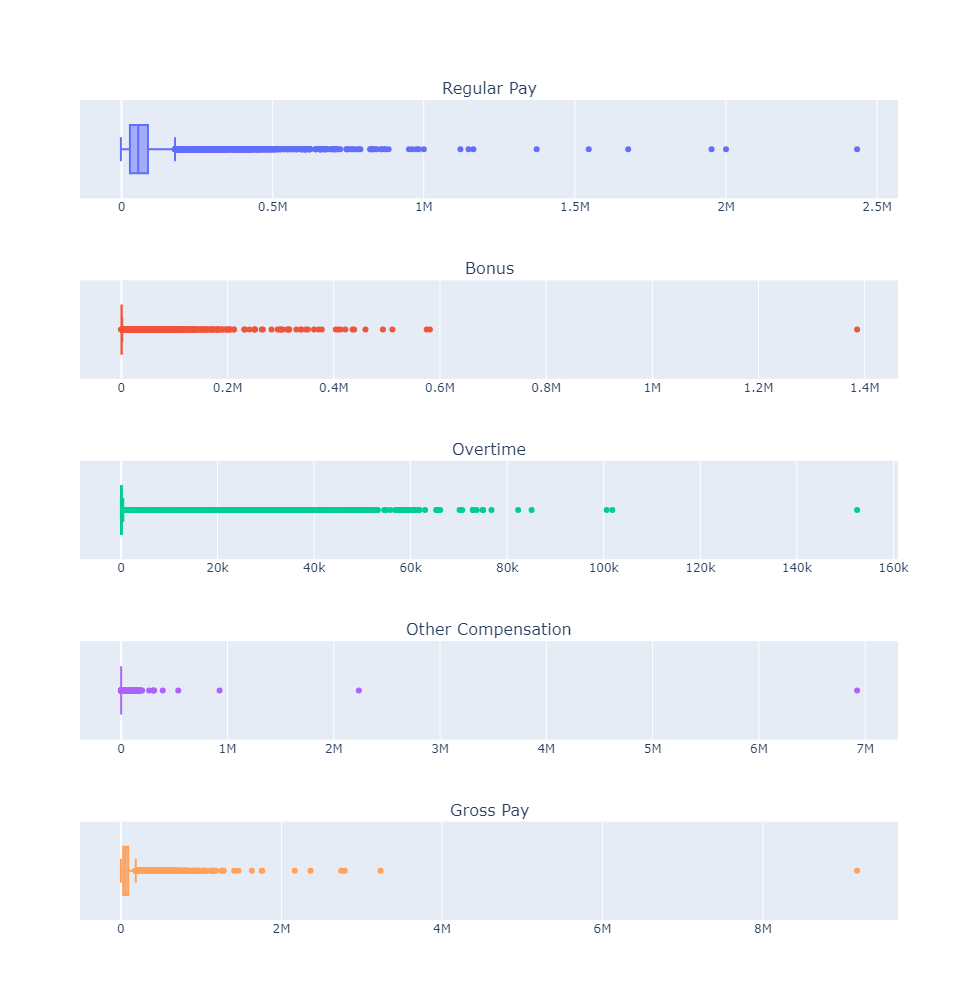

In [18]:
# Create boxplots
fig = make_subplots(rows=5, cols=1, subplot_titles=("Regular Pay", "Bonus", "Overtime", "Other Compensation", "Gross Pay"))
fig.add_trace(go.Box(x=df.regular_pay), row=1, col=1)
fig.add_trace(go.Box(x=df.bonus), row=2, col=1)
fig.add_trace(go.Box(x=df.overtime), row=3, col=1)
fig.add_trace(go.Box(x=df.other), row=4, col=1)
fig.add_trace(go.Box(x=df.gross_pay), row=5, col=1)

fig.update_layout(height=1000, width=1100, showlegend=False)
fig.update_yaxes(showticklabels=False)
fig.show()

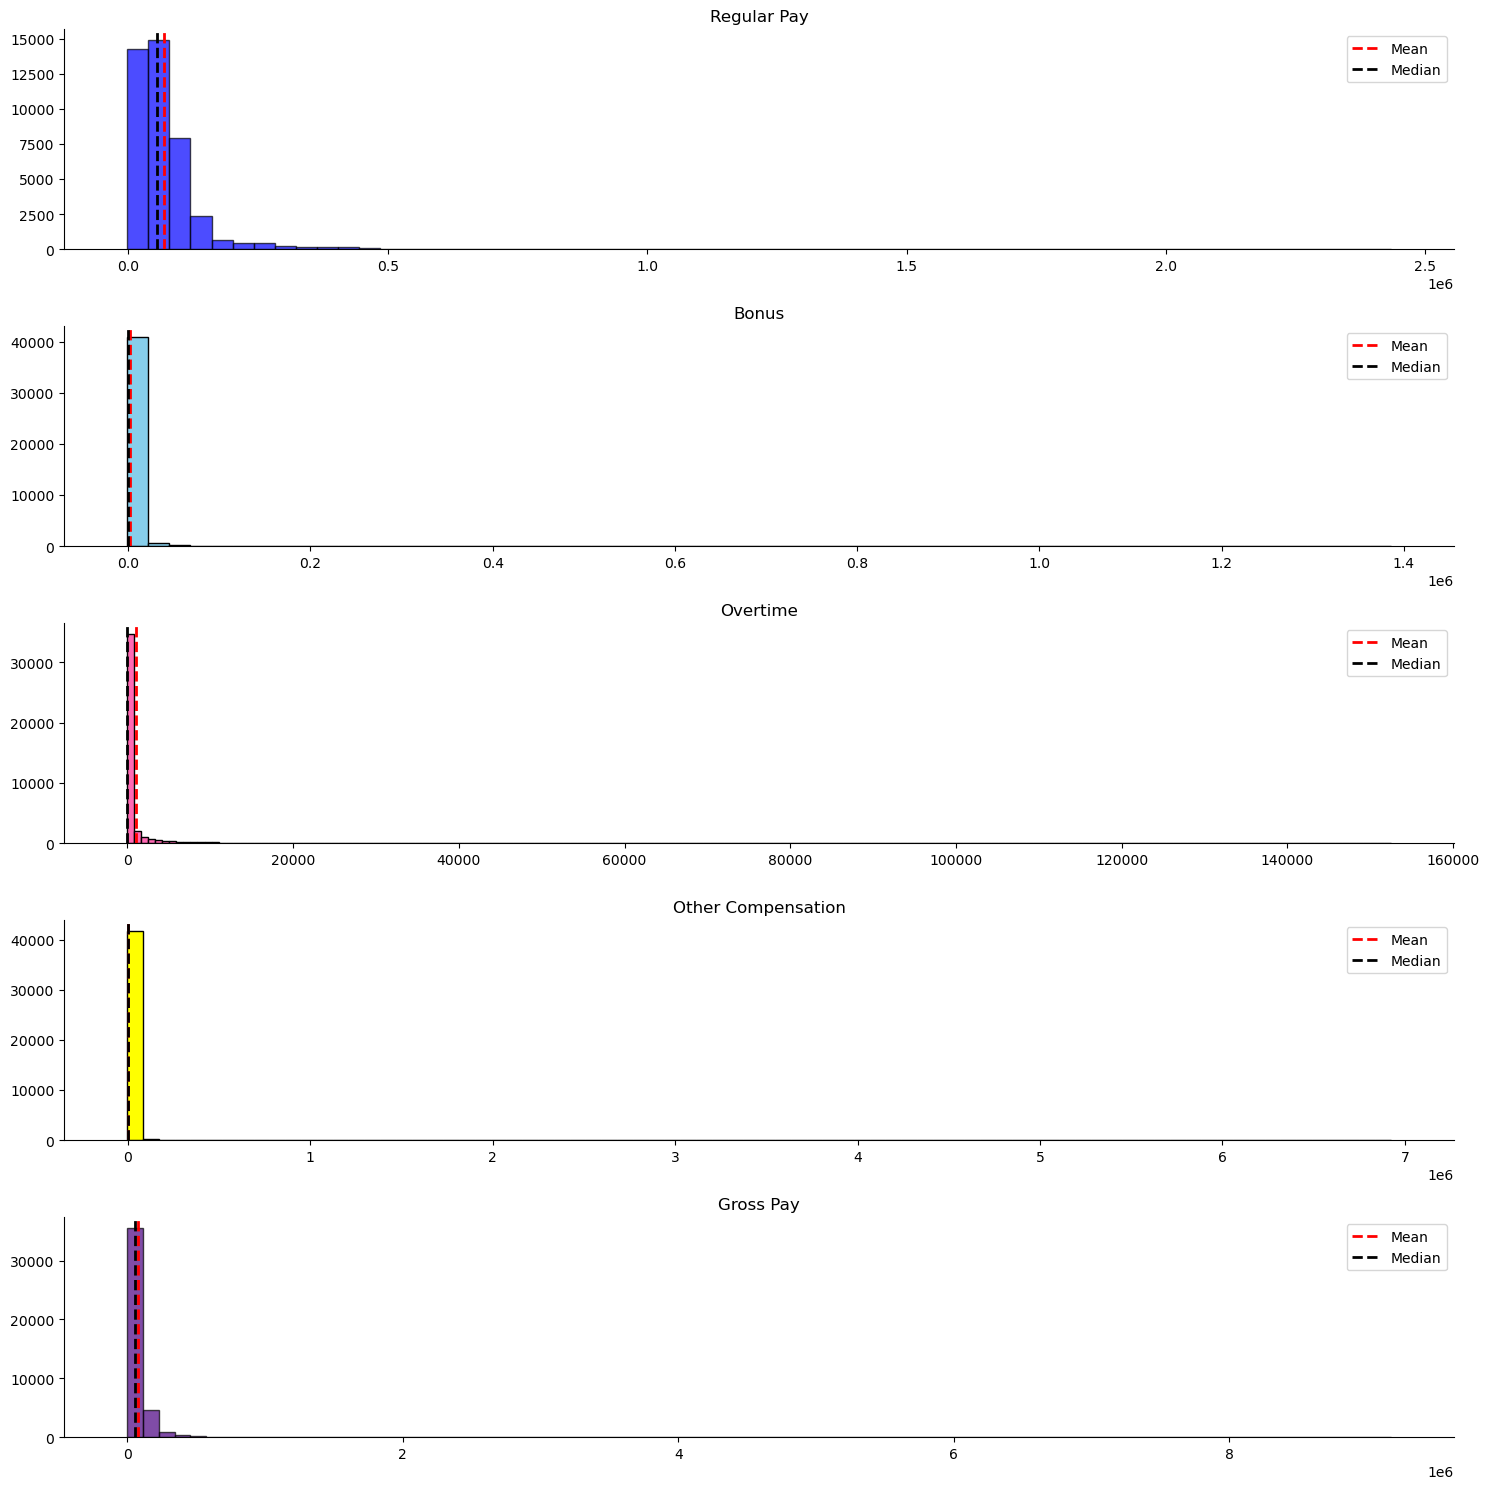

In [19]:
# Create histograms
fig, axs = plt.subplots(5, 1, figsize=(15, 15))
sns.despine(fig)
axs[0].hist(df.regular_pay, bins=60, color='blue', edgecolor='black', alpha=0.7)
axs[0].axvline(x=df.regular_pay.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
axs[0].axvline(x=df.regular_pay.median(), color='black', linestyle='dashed', linewidth=2, label='Median')
axs[0].legend()
axs[0].set_title('Regular Pay')

axs[1].hist(df.bonus, bins=60, color='skyblue', edgecolor='black')
axs[1].axvline(x=df.bonus.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
axs[1].axvline(x=df.bonus.median(), color='black', linestyle='dashed', linewidth=2, label='Median')
axs[1].legend()
axs[1].set_title('Bonus')

axs[2].hist(df.overtime, bins=180, color='hotpink', edgecolor='black')
axs[2].axvline(x=df.overtime.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
axs[2].axvline(x=df.overtime.median(), color='black', linestyle='dashed', linewidth=2, label='Median')
axs[2].legend()
axs[2].set_title('Overtime')

axs[3].hist(df.other, bins=80, color='yellow', edgecolor='black')
axs[3].axvline(x=df.other.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
axs[3].axvline(x=df.other.median(), color='black', linestyle='dashed', linewidth=2, label='Median')
axs[3].legend()
axs[3].set_title('Other Compensation')

axs[4].hist(df.gross_pay, bins=80, color='indigo', edgecolor='black', alpha=0.7)
axs[4].axvline(x=df.gross_pay.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
axs[4].axvline(x=df.gross_pay.median(), color='black', linestyle='dashed', linewidth=2, label='Median')
axs[4].legend()
axs[4].set_title('Gross Pay')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

### Observations
- The **negative minimum values are normal** as the dataset description says "amounts represent paid earnings, including corrections to prior payrolls and in some cases may reflect negative values".
- The mean is higher than the median, indicating a **right-skewed distribution**.
- The standard deviation is quite large, indicating **high variability** (especially in regular pay).
- There are some **extreme outliers**. This needs to be investigated and potentially be removed or capped to prevent them from skewing analyses.
- **Many employees do not receive bonuses, do not earn overtime or receive other compensation** since the 25th and 50th percentiles are 0.

## Highest Paying Jobs

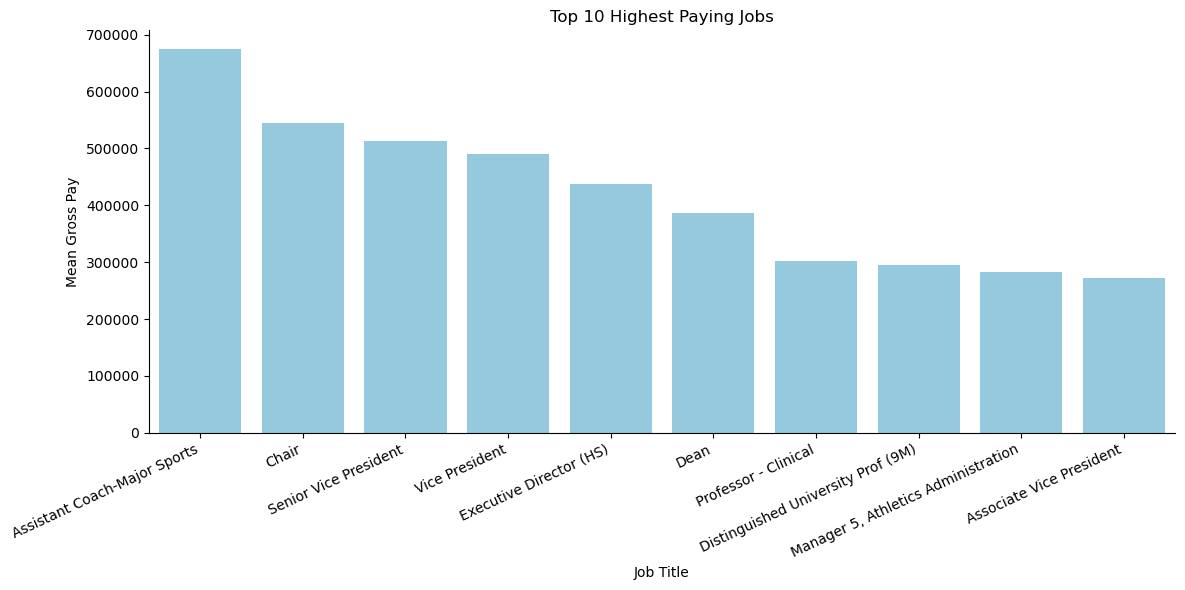

In [20]:
df3 = df[df['job'].map(df['job'].value_counts()) >= 5]
# Get the top 10 job titles with the highest mean salary
top_10 = df3.groupby('job')['gross_pay'].mean().nlargest(10)

# Create a single bar plot for the top 10 highest paying job titles and their mean salaries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.index, y=top_10.values, color='skyblue')
sns.despine(top=True, right=True, left=False, bottom=False)
# Customize the plot
plt.xlabel('Job Title')
plt.ylabel('Mean Gross Pay')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=25, ha = 'right') 

# Show the plot
plt.tight_layout()
plt.show()

## Gross Pay: categories distribution
Let's see what the distribution of the quality column looks like:

In [21]:
df1 = df.copy()

In [23]:
# Discretize variables into buckets
bins = [0, 25000, 50000, 75000, 100000, 150000, 200000, 350000, 500000, 1000000, 10000000]
labels = ['0-25K', '25-50K', '50-75K', '75-100K', '100-150K', '150-200K', '200-350K', '350K-500K', '500K-1M', '1M-10M']
df1['gross_pay_c'] = pd.cut(df1['gross_pay'], bins, labels= labels)

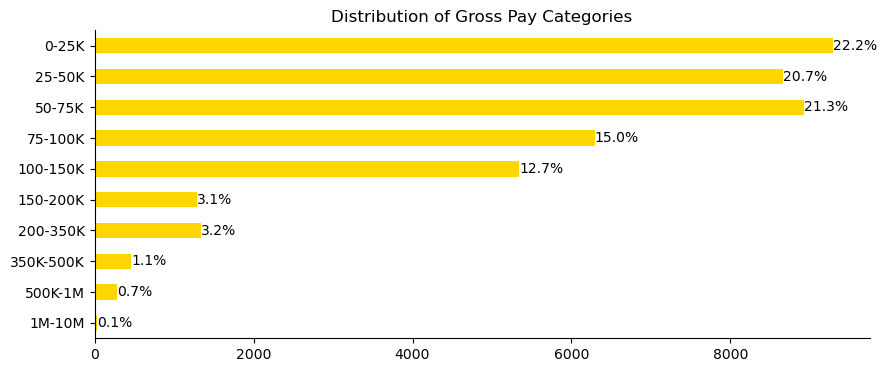

In [189]:
ax = df1.gross_pay_c.value_counts().sort_index().plot.barh(title= 'Distribution of Gross Pay Categories', 
                                                           figsize=(10, 4), color = 'gold')
ax.axes.invert_yaxis()
for bar in ax.patches:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()/df.shape[0]:.1%}', verticalalignment='center')
ax.spines[['right', 'top']].set_visible(False) 
plt.xlabel('')
plt.ylabel('')
plt.show()

**Observations:**
- The distribution is skewed towards the lower pay ranges, with over 60% of employees earning under 75K.
- A relatively small percentage of employees are in the highest pay ranges, indicating that higher salaries (above 150K) are rare in this dataset reflecting a typical salary distribution where a smaller number of employees earn higher wages.
- The concentration of salaries in the lower pay brackets may suggest a wage disparity across different positions or departments.

## Gross Pay by Position Group

### Mean and Median Gross Pay by Position Group

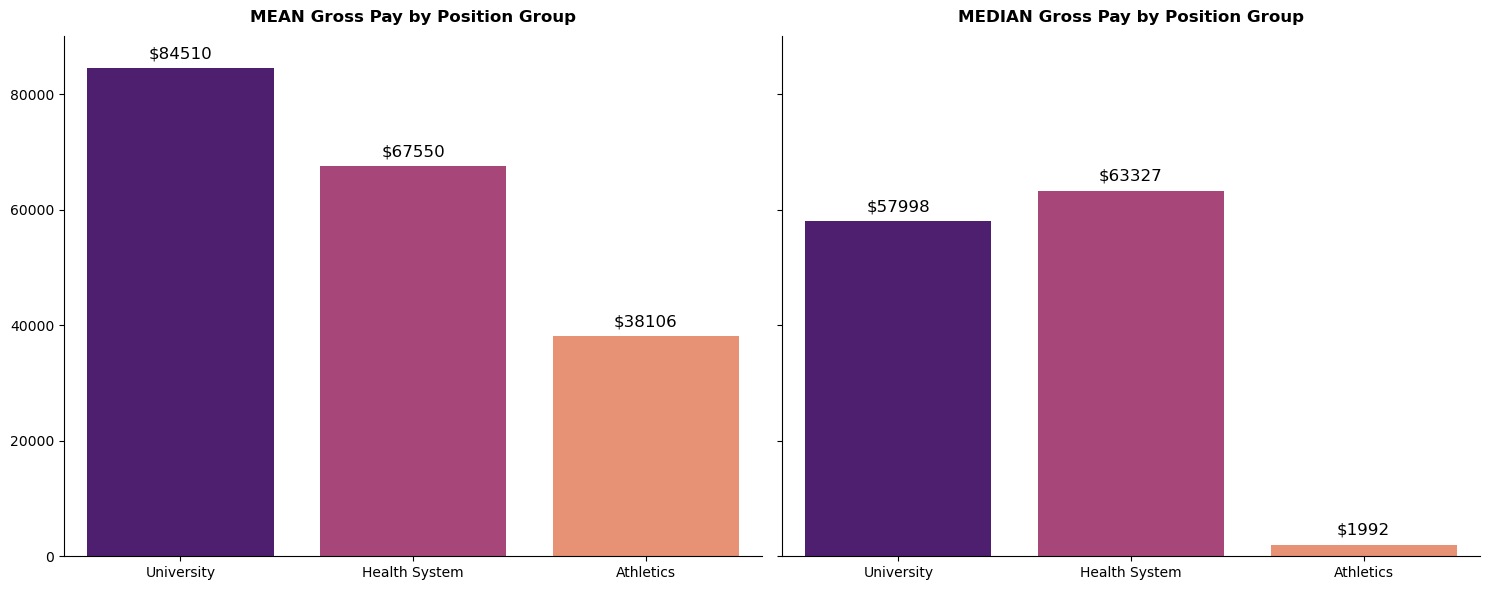

In [226]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True, tight_layout = True)

ax = sns.barplot(ax=axes[0], x='position_group', y='gross_pay', data=df,  estimator=np.mean, errwidth=0, palette = "magma")
for i in ax.containers:
    ax.bar_label(i, fontsize=12, padding=5, fmt='$%0.f')
axes[0].set_title('MEAN Gross Pay by Position Group', pad = 10, fontweight ='bold')
ax.set(xlabel='', ylabel='')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax2 = sns.barplot(ax=axes[1], x='position_group', y='gross_pay', data=df,  estimator=np.median, errwidth=0, palette = "magma")
for i in ax2.containers:
    ax2.bar_label(i, fontsize=12, padding=5, fmt='$%0.f')
axes[1].set_title('MEDIAN Gross Pay by Position Group', pad = 10, fontweight ='bold')
ax2.set(xlabel='', ylabel='')
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

**Observations**
- The University group has a very high pay disparity (larger gap between mean and median), which could indicate income inequality within this group.
- The Health System group shows the most consistent salary distribution, with the mean and median closely aligned.
- The Athletics group displays an extreme skew, where most employees earn very low wages, but a few individuals with much higher salaries inflate the mean considerably.
The Athletics group's median being so low suggests that it has a large number of part-time, temporary, or lower-wage roles with only a few individuals earning significantly more, which leads to the skew.

### Mean and Median Gross Pay By Gender and Position Group

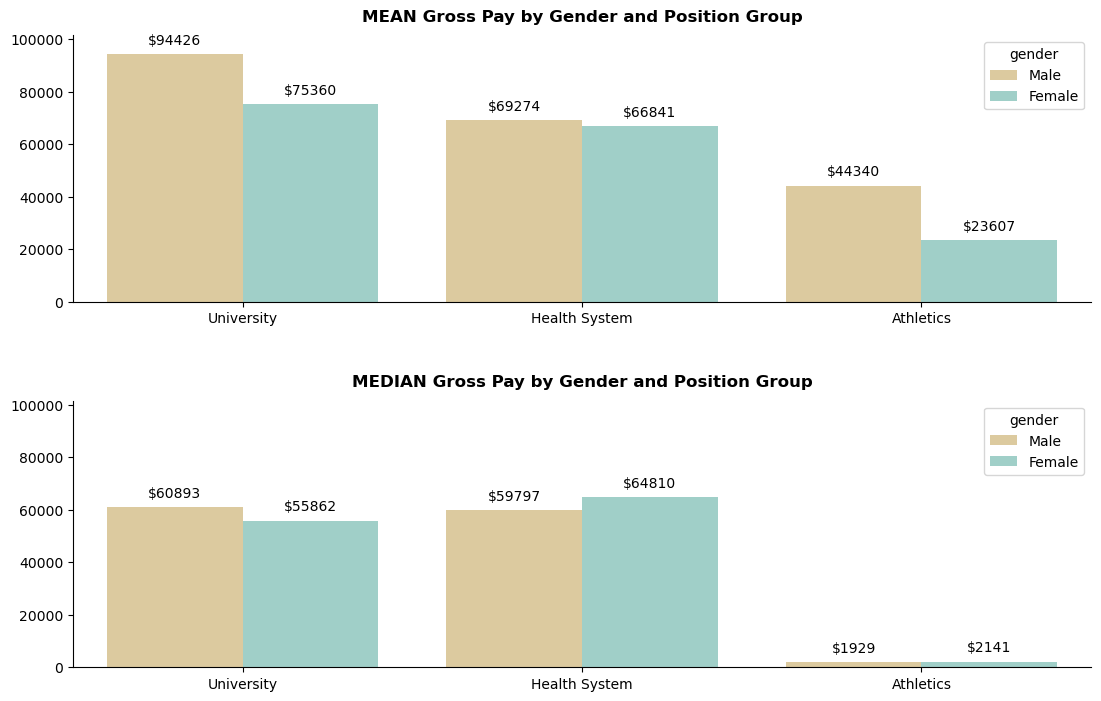

In [265]:
fig, axes = plt.subplots(2,1, figsize=(12, 8), sharey=True)
fig.tight_layout(pad=5)
ax = sns.barplot(ax=axes[0], x='position_group', y='gross_pay', hue='gender', data=df, 
                 estimator=np.mean, errwidth=0, palette = "BrBG")
for i in ax.containers:
    ax.bar_label(i, fontsize=10, padding=5, fmt='$%0.f')
axes[0].set_title('MEAN Gross Pay by Gender and Position Group', pad = 10, fontweight ='bold')
ax.set(xlabel='', ylabel='')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax2 = sns.barplot(ax=axes[1], x='position_group', y='gross_pay', hue='gender', data=df, 
                  estimator=np.median, errwidth=0, palette = "BrBG")
for i in ax2.containers:
    ax2.bar_label(i, fontsize=10, padding=5, fmt='$%0.f')
axes[1].set_title('MEDIAN Gross Pay by Gender and Position Group', pad = 10, fontweight ='bold')
ax2.set(xlabel='', ylabel='')
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

**Observations:**

Gender Pay Gap: In all three groups (University, Health System, and Athletics), males consistently earn more than females (excluding the median in Health System), although the size of the gap varies significantly.
- University: The gender pay gap is present in both mean and median pay, with males earning more.
- Health System positions have the smallest gender gap, and the median indicates females earn slightly more.
- Athletics: There is a significant difference in mean pay between genders, but the median pay is relatively similar, indicating that outliers may be skewing the mean.

These observations point to a persistent gender pay gap across different position groups, with certain sectors (like Athletics) showing a much more severe disparity than others.

## Gross Pay and Gender

### Mean Gross Pay By Gender

In [25]:
average_salary = df.groupby(["gender"])["gross_pay"].mean().reset_index().sort_values(by='gross_pay', ascending=False)
average_salary

gender  gross_pay
1    Male   82573.18
0  Female   69683.90

A very pronounced gender pay disparity can be observed here.

### Gross Pay categories by gender

In [26]:
# Create a contingency table
cross_gross = pd.crosstab(df1.gender, df1.gross_pay_c, margins=True)
cross_gross

gross_pay_c  0-25K  25-50K  50-75K  75-100K  100-150K  150-200K  200-350K  \
gender                                                                      
Female        4916    5410    5458     4090      3274       674       591   
Male          4371    3247    3465     2201      2066       614       742   
All           9287    8657    8923     6291      5340      1288      1333   

gross_pay_c  350K-500K  500K-1M  1M-10M    All  
gender                                          
Female             152       71       3  24639  
Male               308      207      27  17248  
All                460      278      30  41887

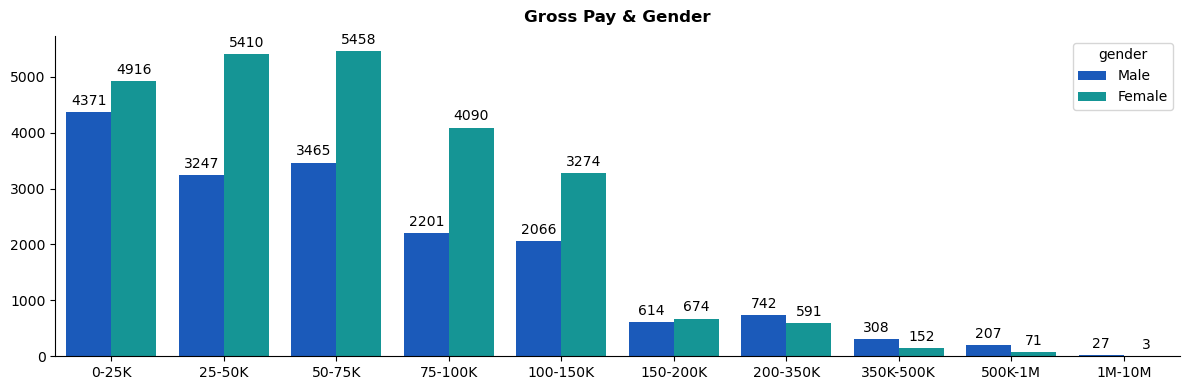

In [269]:
fig = plt.figure(figsize = (12,4), tight_layout = True)
p1 = sns.countplot(x ='gross_pay_c', hue = "gender", data = df1, palette = "winter")
for container in p1.containers:
    p1.bar_label(container, fontsize=10, padding=3)
p1.set(xlabel='', ylabel='')
p1.spines["top"].set_visible(False)
p1.spines["right"].set_visible(False)
p1.set_title('Gross Pay & Gender', pad = 10, fontweight ='bold')
plt.show()

**Observations:**

The chart shows that while females are more prevalent in low-to-mid salary ranges, males increasingly dominate higher gross pay brackets, especially in the top earning categories, indicating a gender disparity in higher-paying roles.**

# Outliers

## Skewness and kurtosis
Skewness and kurtosis describe how symmetrical 
the distribution is and how fat the tails of the distribution are, respectivelylly

In [29]:
numcol.skew()

regular_pay     5.45
bonus          28.62
other         155.76
overtime        8.95
gross_pay      22.90
dtype: float64

In [30]:
numcol.kurtosis()

regular_pay      76.05
bonus          1610.58
other         28007.99
overtime        129.32
gross_pay      1697.63
dtype: float64

**Both measures are significantly higher than we would expect if our variables were distributed normally.**

## Correlation
If a variable of interest is significantly correlated with another variable, we should take that relationship into account when trying to identify outliers. Let's see which ones are more corellated. 

In [31]:
pd.options.display.float_format = '{:.2f}'.format
corr_mat = numcol.corr()
corr_mat

regular_pay  bonus  other  overtime  gross_pay
regular_pay         1.00   0.55   0.23      0.05       0.92
bonus               0.55   1.00   0.11     -0.02       0.61
other               0.23   0.11   1.00     -0.02       0.56
overtime            0.05  -0.02  -0.02      1.00       0.07
gross_pay           0.92   0.61   0.56      0.07       1.00

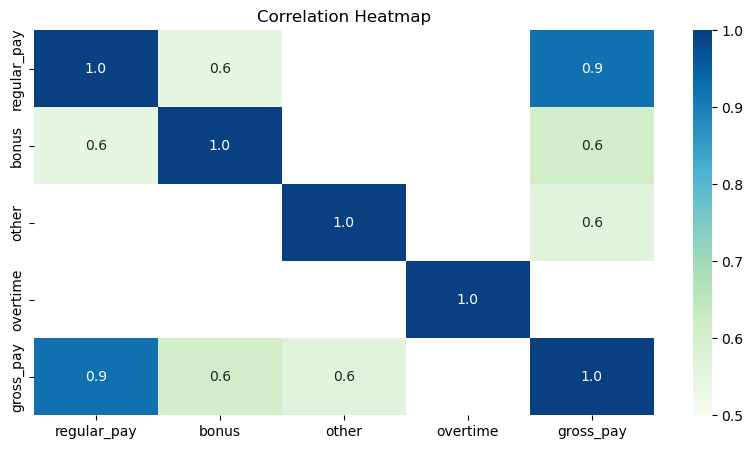

In [32]:
# Select correlations greater than 0.5
high_corr = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(high_corr,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

**Regular Pay and Gross Pay are highly correlated**. We also see smaller (0.6) but still substantial correlation between Regular Pay and Bonus, Gross Pay and Bonus, Gross Pay and Other.

## Bivariate Outliers: Gross Pay and Regular Pay
Let's investigate the relationship and see if there's anything unusual.

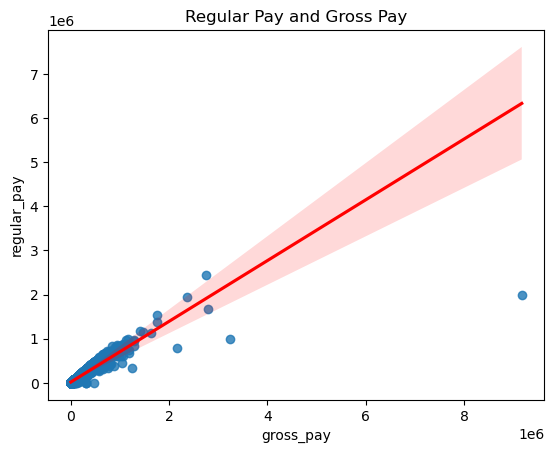

In [33]:
# do a scatterplot of regular_pay by gross_pay
ax = sns.regplot(x="gross_pay", y="regular_pay", data=df1, line_kws={"color": "red"})
ax.set(title="Regular Pay and Gross Pay")
plt.show()

In [34]:
# see if they have unexpected low or high values
df1['regular_pay_qq'] = pd.qcut(df1['regular_pay'], labels=['very low','low','medium', 'high','very high'], q=5, precision=0)
df1['gross_pay_qq'] = pd.qcut(df1['gross_pay'], labels=['very low','low','medium', 'high','very high'], q=5, precision=0)

In [35]:
cross = pd.crosstab(df1.regular_pay_qq, df1.gross_pay_qq)
cross

gross_pay_qq    very low   low  medium  high  very high
regular_pay_qq                                         
very low            8175   185       9     2          7
low                  203  7674     458    36          6
medium                 0   518    7340   496         23
high                   0     0     570  7341        466
very high              0     0       0   502       7876

In [36]:
df1.loc[(df1.regular_pay_qq=="very low") & (df1.gross_pay_qq=="very high") | (df1.regular_pay_qq=="very low") & (df1.gross_pay_qq=="high")]. T

5064   \
full_name                                             Thomas Ryan   
gender                                                       Male   
position_group                                      Health System   
job                                                     Physician   
hierarchy                                    Health Sciences CCH6   
cost_center     CC11301 Health Sciences | FGP IM Cardiovascula...   
regular_pay                                              19817.66   
bonus                                                        0.00   
other                                                   109761.60   
overtime                                                     0.00   
gross_pay                                               129579.26   
gross_pay_c                                              100-150K   
regular_pay_qq                                           very low   
gross_pay_qq                                            very high   

                                                            13930  \
full_name                                             Meghan Cook   
gender                                                     Female   
position_group                                      Health System   
job                                        Intermittent Physician   
hierarchy                                    Health Sciences CCH6   
cost_center     CC14267 Health Sciences | Anesthesiology Services   
regular_pay                                                  0.00   
bonus                                                     5697.33   
other                                                   109742.33   
overtime                                                     0.00   
gross_pay                                               115439.66   
gross_pay_c                                              100-150K   
regular_pay_qq                                           very low   
gross_pay_qq                                            very high   

                                                   18137  \
full_name                                    Mary Cairns   
gender                                            Female   
position_group                             Health System   
job                               Intermittent Physician   
hierarchy                           Health Sciences CCH6   
cost_center     CC12915 Health Sciences | FGP Psychiatry   
regular_pay                                         0.00   
bonus                                               0.00   
other                                          103872.00   
overtime                                            0.00   
gross_pay                                      103872.00   
gross_pay_c                                     100-150K   
regular_pay_qq                                  very low   
gross_pay_qq                                   very high   

                                                  19303  \
full_name                                  Kevin Wilson   
gender                                             Male   
position_group                                Athletics   
job                        Assistant Coach-Major Sports   
hierarchy       Athletics and Business Advancement CCH6   
cost_center                CC12637 Athletics | Football   
regular_pay                                     5303.09   
bonus                                         297500.00   
other                                         161687.67   
overtime                                           0.00   
gross_pay                                     464490.76   
gross_pay_c                                   350K-500K   
regular_pay_qq                                 very low   
gross_pay_qq                                  very high   

                                                       22224  \
full_name                                     Michael Schmid   
gender                                                  Male   
position_

**There are people with very low Regular Pay but very high Gross Pay.**

In [37]:
df1.loc[(df1.job=="Intermittent Physician") & (df1.regular_pay > 0)]

full_name  gender position_group                     job  \
1282      Jason Bryant    Male     University  Intermittent Physician   
5999     Jessica Short  Female  Health System  Intermittent Physician   
21188      Anita Chang  Female  Health System  Intermittent Physician   
21984  Geoffrey Thomas    Male     University  Intermittent Physician   

                  hierarchy                               cost_center  \
1282          Medicine CCH6         CC12848 Medicine | Anesthesiology   
5999   Health Sciences CCH6  CC12915 Health Sciences | FGP Psychiatry   
21188  Health Sciences CCH6  CC12915 Health Sciences | FGP Psychiatry   
21984         Medicine CCH6         CC12848 Medicine | Anesthesiology   

       regular_pay    bonus    other  overtime  gross_pay gross_pay_c  \
1282        811.37     0.00  6383.06      0.00    7194.43       0-25K   
5999     184767.30 23206.00 49291.60      0.00  257264.90    200-350K   
21188    132545.25  4702.03 22083.43      0.00  159330.71    150-200K   
21984     33612.00     0.00 14025.00      0.00   47637.00      25-50K   

      regular_pay_qq gross_pay_qq  
1282        very low     very low  
5999       very high    very high  
21188      very high    very high  
21984            low       medium

### Observations
- 6 of the 9 individuals are Intermittent Physicians, suggesting they might not be full-time employees, which could explain the low regular pay and high "other" compensation.
- Kevin Wilson, an Assistant Coach in Major Sports, has a different structure with a notable bonus and other compensations contributing to the gross pay.
- Robert Bornstein, listed as "Retiree-Faculty Emeritus," has a small regular_pay but his gross pay is primarily from other categories. This might be linked to retirement or emeritus status benefits.
- The table includes both male and female employees. However, the male employees seem to dominate the higher gross_pay values.

**Conclusion**:\
Certain roles, especially those in the Health System as Intermittent Physicians, receive most of their income through compensation mechanisms other than regular salary. The stark difference between Regular Pay and Gross Pay highlights a unique compensation structure within these roles.

## Using Isolation Forest to find outliers
Isolation Forest offers some advantages over classical techniques like Z-score or Interquartile Range (IQR) for datasets with skewed distributions, heavy tails, and lots of outliers (the algorithm does not make any assumptions about the underlying distribution of the data and works effectively regardless of skewness and heavy tails).

In [38]:
# create a standardized analysis data frame
standardizer = StandardScaler()
if_analysis = df1[['full_name', 'gender', 'position_group', 'regular_pay', 'bonus','other','gross_pay', 'overtime']]
if_analysisstand = standardizer.fit_transform(if_analysis.iloc[:, 3:])

In [39]:
# run an isolation forest model to detect outliers
clf=IsolationForest(n_estimators=100, max_samples='auto', max_features=1.0, contamination = 0.1)
clf.fit(if_analysisstand)
if_analysis['anomaly'] = clf.predict(if_analysisstand)
if_analysis['scores'] = clf.decision_function(if_analysisstand)
if_analysis.anomaly.value_counts()

anomaly
 1    37698
-1     4189
Name: count, dtype: int64

**4189 individuals (or 10%) are identified as outliers (they have anomaly values of -1.) - we set the contamination to 0.1**

In [40]:
# view the outliers
inlier, outlier = if_analysis.loc[if_analysis.anomaly==1], if_analysis.loc[if_analysis.anomaly==-1]
outlier[['full_name', 'gender', 'position_group','regular_pay','bonus','other', 'gross_pay','scores']].sort_values(['scores']).head(5)

full_name  gender position_group  regular_pay     bonus      other  \
3242   Eugene Smith    Male      Athletics   1676222.04 575000.00  537000.00   
19302      Ryan Day    Male      Athletics   2000000.04 250000.00 6923462.58   
15356  Kevin Mcguff    Male      Athletics    675000.00 110000.00  391533.48   
7794    Mina Makary  Female     University    422064.40 266412.14  122715.56   
10470   Arpit Nagar    Male     University    420307.98 198604.16  110305.88   

       gross_pay  scores  
3242  2788222.04   -0.37  
19302 9173462.62   -0.37  
15356 1176533.48   -0.36  
7794   811192.10   -0.35  
10470  729218.02   -0.34

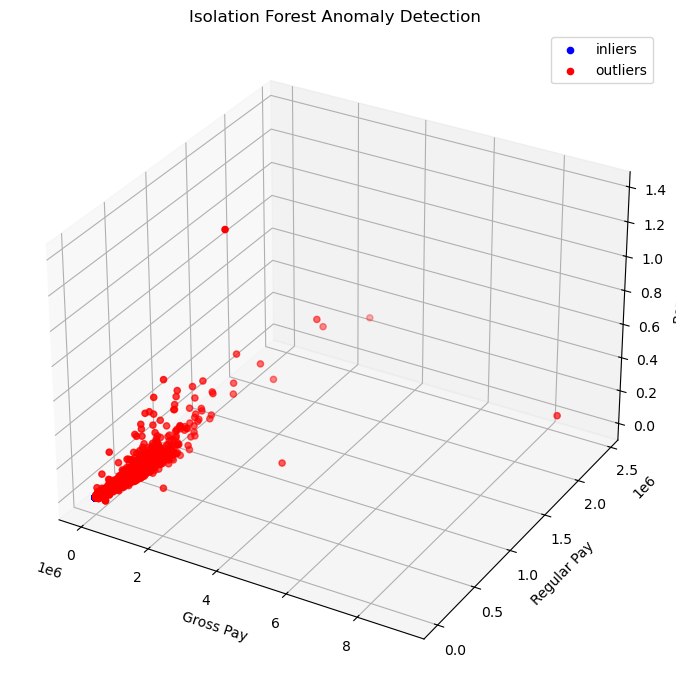

In [41]:
# plot the inliers and outliers
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.set_title('Isolation Forest Anomaly Detection')
ax.set_zlabel("Bonus")
ax.set_xlabel("Gross Pay")
ax.set_ylabel("Regular Pay")
ax.scatter3D(inlier.gross_pay, inlier.regular_pay, inlier.bonus, label="inliers", c="blue")
ax.scatter3D(outlier.gross_pay, outlier.regular_pay, outlier.bonus, label="outliers", c="red")
ax.legend()
plt.tight_layout()
plt.show()

# Models
Let's see how different algorithms deal with outliers

In [42]:
# Separating the dataset
X = df[['regular_pay', 'bonus', 'other']]
y = df.gross_pay

# Splitting data into 25% training and 75% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [43]:
X.shape, y.shape # original data

((41887, 3), (41887,))

In [44]:
X_train.shape, y_train.shape # training data

((31415, 3), (31415,))

In [45]:
X_test.shape, y_test.shape # testing data

((10472, 3), (10472,))

In [46]:
# Define the models
models = [
    ('Random Forest', RandomForestRegressor(n_estimators=20)),
    ('Decision Tree', DecisionTreeRegressor(max_depth=10, min_samples_split=2, random_state=0)),
    ('Linear Regression', LinearRegression()),
    ('RANSAC Boosting', RANSACRegressor(random_state=42)),
    ('Huber Regression', HuberRegressor())
]
best_model = None
best_score = -np.inf
best_RMSE = np.inf

# Model training, evaluation, and selection
print("Model performance:")
for name, model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print(f"{name} - score: {score:.3f}, MSE : {mse:.0f}, MAE : {mae:.0f}, RMSE : {rmse:.0f}")
    
    if score > best_score and rmse < best_RMSE:
        best_score = score
        best_model = name
        best_RMSE = rmse
        
print(f"Best model: {best_model} with score: {best_score:.3f} and RMSE: {best_RMSE:.0f}")

Model performance:
Random Forest - score: 0.995, MSE : 43447199, MAE : 2120, RMSE : 6591
Decision Tree - score: 0.970, MSE : 241246573, MAE : 3215, RMSE : 15532
Linear Regression - score: 0.998, MSE : 17605709, MAE : 1734, RMSE : 4196
RANSAC Boosting - score: 0.998, MSE : 17593195, MAE : 1611, RMSE : 4194
Huber Regression - score: 0.998, MSE : 18961768, MAE : 1113, RMSE : 4355
Best model: RANSAC Boosting with score: 0.998 and RMSE: 4194
